In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(axis=1, columns=["UDI", "Product ID"])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df = pd.get_dummies(df, columns=["Type"])
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0.304348,0.358025,0.222934,0.535714,0.000000,0,0,0,0,0,0,0,0,1
1,0.315217,0.370370,0.139697,0.583791,0.011858,0,0,0,0,0,0,0,1,0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0,0,0,0,0,0,0,1,0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0,0,0,0,0,0,0,1,0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0,0,0,0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# trainX = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L','Type_M']]
trainX = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

trainX.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9254,0.326087,0.419753,0.260768,0.375000,0.770751
1561,0.315217,0.333333,0.128056,0.686813,0.541502
1670,0.315217,0.259259,0.209546,0.375000,0.766798
6087,0.608696,0.629630,0.250873,0.401099,0.027668
6669,0.663043,0.592593,0.234575,0.413462,0.822134


In [179]:
trainY = train[['Machine failure','TWF','HDF','PWF','OSF','RNF']]
trainY.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
9254,0,0,0,0,0,0
1561,0,0,0,0,0,0
1670,0,0,0,0,0,0
6087,0,0,0,0,0,0
6669,0,0,0,0,0,0


In [180]:
xtrain = trainX.values
print(xtrain)

[[0.32608696 0.41975309 0.26076834 0.375      0.77075099]
 [0.31521739 0.33333333 0.12805588 0.68681319 0.54150198]
 [0.31521739 0.25925926 0.20954598 0.375      0.76679842]
 ...
 [0.81521739 0.81481481 0.18335274 0.59615385 0.88142292]
 [0.08695652 0.14814815 0.21711292 0.3956044  0.13043478]
 [0.5326087  0.58024691 0.37252619 0.3021978  0.13833992]]


In [181]:
ytrain = trainY['Machine failure'].values

In [182]:
import numpy as np
X_train_res = np.array(xtrain)
y_train_res = np.array(ytrain)

In [13]:
# testX = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L','Type_M']]
testX = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

testX.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6252,0.597826,0.567901,0.215367,0.443681,0.782609
4684,0.902174,0.753086,0.147264,0.563187,0.399209
1731,0.326087,0.271605,0.184517,0.524725,0.462451
4742,0.869565,0.691358,0.246799,0.410714,0.055336
4521,0.771739,0.580247,0.405704,0.276099,0.509881


In [14]:
testY = test[['Machine failure','TWF','HDF','PWF','OSF','RNF']]
testY.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
6252,0,0,0,0,0,0
4684,1,0,0,0,0,0
1731,0,0,0,0,0,0
4742,0,0,0,0,0,0
4521,0,0,0,0,0,0


In [15]:
xtest = testX.values
print(xtest)

[[0.59782609 0.56790123 0.21536671 0.44368132 0.7826087 ]
 [0.90217391 0.75308642 0.14726426 0.56318681 0.39920949]
 [0.32608696 0.27160494 0.18451688 0.52472527 0.46245059]
 ...
 [0.54347826 0.74074074 0.08672875 0.7239011  0.02766798]
 [0.17391304 0.22222222 0.90395809 0.07554945 0.07114625]
 [0.61956522 0.72839506 0.0774156  0.7032967  0.03557312]]


In [16]:
xtest = np.array(xtest)

In [17]:
ytest = testY['Machine failure'].values
ytest = np.array(ytest)

In [18]:
# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=75, random_state=0, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [184]:
predictions = randomClassifier.predict(xtest)

In [185]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1933    6]
 [  22   39]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.87      0.64      0.74        61

    accuracy                           0.99      2000
   macro avg       0.93      0.82      0.86      2000
weighted avg       0.99      0.99      0.98      2000



In [186]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.7288266912013945

In [159]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9854693163890352

[0.         0.00309438 1.        ]
[0.         0.63934426 1.        ]


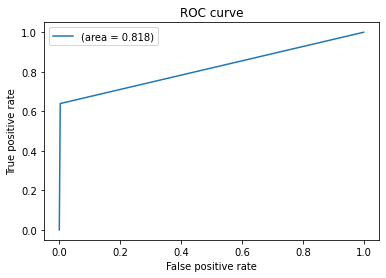

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, predictions)
tp = tpr_keras
fp = fpr_keras
print(fpr_keras)
print(tpr_keras)



auc_rf = auc(fp, tp)
plt.plot(fp,tp,label="(area = {:.3f})".format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# XGB Classifier

In [43]:
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier()
xgbClassifier.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
predictions = xgbClassifier.predict(xtest)

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1932    7]
 [  27   34]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.83      0.56      0.67        61

    accuracy                           0.98      2000
   macro avg       0.91      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



In [46]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.658288022995206

In [ ]:
#Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predictions = logreg.predict(xtest)

In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1939    0]
 [  60    1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       1.00      0.02      0.03        61

    accuracy                           0.97      2000
   macro avg       0.98      0.51      0.51      2000
weighted avg       0.97      0.97      0.96      2000



In [78]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.03130499362275774

In [ ]:
# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train_res, y_train_res)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
predictions = ridge.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.0

In [ ]:
#SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train_res, y_train_res)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predictions = sgd.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.0

In [ ]:
# Passive Aggressive Classifier

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
pclf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
pclf.fit(X_train_res, y_train_res)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=0, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [68]:
predictions = pclf.predict(xtest)

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1937    2]
 [  54    7]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       0.78      0.11      0.20        61

    accuracy                           0.97      2000
   macro avg       0.88      0.56      0.59      2000
weighted avg       0.97      0.97      0.96      2000



In [70]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.19367611697455756

In [ ]:
# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False)
perceptron.fit(X_train_res, y_train_res)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predictions = perceptron.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.0

In [ ]:
#LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [48]:
predictions = lda.predict(xtest)

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1917   22]
 [  37   24]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1939
           1       0.52      0.39      0.45        61

    accuracy                           0.97      2000
   macro avg       0.75      0.69      0.72      2000
weighted avg       0.97      0.97      0.97      2000



In [50]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.4337485843714609

In [ ]:
#QDA

In [63]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_res, y_train_res)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [64]:
predictions = qda.predict(xtest)

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1906   33]
 [  40   21]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1939
           1       0.39      0.34      0.37        61

    accuracy                           0.96      2000
   macro avg       0.68      0.66      0.67      2000
weighted avg       0.96      0.96      0.96      2000



In [66]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.34649884518289087

In [ ]:
#SVM

In [ ]:
from sklearn.svm import SVC
svmc = SVC(gamma='auto')
svmc.fit(X_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svmc.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1931    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.0

In [ ]:
#kNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
predictions = neigh.predict(xtest)

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1926   13]
 [  39   22]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.63      0.36      0.46        61

    accuracy                           0.97      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.97      0.97      0.97      2000



In [62]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.44601289085388585

In [ ]:
# Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
predictions = nb.predict(xtest)

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1916   23]
 [  48   13]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1939
           1       0.36      0.21      0.27        61

    accuracy                           0.96      2000
   macro avg       0.67      0.60      0.62      2000
weighted avg       0.96      0.96      0.96      2000



In [74]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.2510864520484368

In [ ]:
#Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
predictions = dt.predict(xtest)

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1919   20]
 [  18   43]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.68      0.70      0.69        61

    accuracy                           0.98      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [42]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.6837470975473755

In [ ]:
#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0),max_samples=0.5, max_features=0.5)
bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
   

In [ ]:
predictions = bagging.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1931    0]
 [  61    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       1.00      0.12      0.21        69

    accuracy                           0.97      2000
   macro avg       0.98      0.56      0.60      2000
weighted avg       0.97      0.97      0.96      2000



In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.2020719966513186

In [ ]:
#Ada Boost

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=75, random_state=0)
ada.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=75, random_state=0)

In [52]:
predictions = ada.predict(xtest)

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1921   18]
 [  33   28]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.61      0.46      0.52        61

    accuracy                           0.97      2000
   macro avg       0.80      0.72      0.76      2000
weighted avg       0.97      0.97      0.97      2000



In [54]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.5105284373380425

In [ ]:
!pip install imblearn

In [79]:
from collections import Counter
counter = Counter(ytrain)
print(counter)

Counter({0: 7722, 1: 278})


In [165]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y_train_res)
print(counter)

Counter({0: 7725, 1: 7725})


In [166]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [82]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(trainY['Machine failure'].values), trainY['Machine failure'].values)
print(class_weights)

[ 0.51800052 14.38848921]


In [167]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
predictions = randomClassifier.predict(xtest)

In [128]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1893   46]
 [  13   48]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1939
           1       0.51      0.79      0.62        61

    accuracy                           0.97      2000
   macro avg       0.75      0.88      0.80      2000
weighted avg       0.98      0.97      0.97      2000



In [129]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.6047324909892406

In [130]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9691847650935994

In [169]:
from sklearn.metrics import fbeta_score
fbeta_score(ytest, predictions, average='macro', beta=0.5)

0.769475627244689

In [170]:
fbeta_score(ytest, predictions, average='macro', beta=1)

0.8020051176643315

In [171]:
fbeta_score(ytest, predictions, average='macro', beta=2)

0.8448350091066201

In [172]:
fbeta_score(ytest, predictions, average='macro', beta=3)

0.8622207871080108

In [173]:
fbeta_score(ytest, predictions, average='macro', beta=0.25)

0.7567873520449598

[0.         0.02372357 1.        ]
[0.         0.78688525 1.        ]


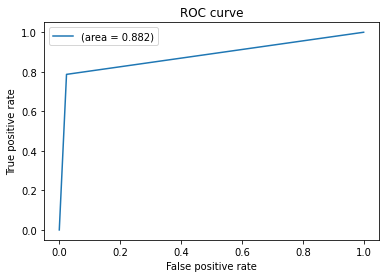

In [178]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, predictions)
tp = tpr_keras
fp = fpr_keras
print(fpr_keras)
print(tpr_keras)



auc_rf = auc(fp, tp)
plt.plot(fp,tp,label="(area = {:.3f})".format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [131]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 130)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [132]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [133]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
predictions = randomClassifier.predict(xtest)

In [135]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1891   48]
 [  13   48]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1939
           1       0.50      0.79      0.61        61

    accuracy                           0.97      2000
   macro avg       0.75      0.88      0.80      2000
weighted avg       0.98      0.97      0.97      2000



In [136]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.5964113692902133

In [137]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9681536009191173

In [138]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state = 139)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [139]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [140]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
predictions = randomClassifier.predict(xtest)

In [142]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1894   45]
 [  14   47]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1939
           1       0.51      0.77      0.61        61

    accuracy                           0.97      2000
   macro avg       0.75      0.87      0.80      2000
weighted avg       0.98      0.97      0.97      2000



In [143]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.5996960403832062

In [144]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9691996802143483

In [145]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [146]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [147]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
predictions = randomClassifier.predict(xtest)

In [149]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1862   77]
 [   8   53]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1939
           1       0.41      0.87      0.55        61

    accuracy                           0.96      2000
   macro avg       0.70      0.91      0.77      2000
weighted avg       0.98      0.96      0.96      2000



In [150]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.5356967280275304

In [151]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9558032208986232

In [110]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [111]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [112]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
predictions = randomClassifier.predict(xtest)

In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1861   78]
 [   9   52]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1939
           1       0.40      0.85      0.54        61

    accuracy                           0.96      2000
   macro avg       0.70      0.91      0.76      2000
weighted avg       0.98      0.96      0.96      2000



In [115]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.52477194515759

In [116]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9547972993420529

In [117]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [118]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [119]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
predictions = randomClassifier.predict(xtest)

In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1862   77]
 [   7   54]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1939
           1       0.41      0.89      0.56        61

    accuracy                           0.96      2000
   macro avg       0.70      0.92      0.77      2000
weighted avg       0.98      0.96      0.97      2000



In [122]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.5435005896450718

In [123]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9563022003712607

In [ ]:
trainX = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L','Type_M']]
xtrain = trainX.values
print(xtrain)

[[0.54347826 0.75308642 0.22060536 ... 0.         1.         0.        ]
 [0.06521739 0.11111111 0.29743888 ... 0.         1.         0.        ]
 [0.10869565 0.19753086 0.23166473 ... 0.         1.         0.        ]
 ...
 [0.32608696 0.2962963  0.32246799 ... 0.         0.         1.        ]
 [0.33695652 0.34567901 0.1338766  ... 1.         0.         0.        ]
 [0.67391304 0.58024691 0.21827707 ... 0.         1.         0.        ]]


In [ ]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC([5,6,7],random_state = 101)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
testX = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L','Type_M']]
xtest = testX.values
print(xtest)

[[0.69565217 0.62962963 0.20256112 ... 0.         0.         1.        ]
 [0.16304348 0.27160494 0.14668219 ... 0.         1.         0.        ]
 [0.80434783 0.59259259 0.05529686 ... 0.         1.         0.        ]
 ...
 [0.23913043 0.2962963  0.17520373 ... 0.         0.         1.        ]
 [0.31521739 0.40740741 0.12165308 ... 0.         1.         0.        ]
 [0.2173913  0.32098765 0.30791618 ... 0.         0.         1.        ]]


In [ ]:
import numpy as np
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = randomClassifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1840   84]
 [  17   59]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1924
           1       0.41      0.78      0.54        76

    accuracy                           0.95      2000
   macro avg       0.70      0.87      0.76      2000
weighted avg       0.97      0.95      0.96      2000



In [160]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomClassifier.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
predictions = randomClassifier.predict(xtest)

In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, predictions))

from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

[[1933    6]
 [  25   36]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [163]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, predictions)

0.6913518787709831

In [164]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(ytest, predictions)

0.9839707883437538